# 총 집 합 코 드

In [2]:
import numpy as np  #배열 
import pandas as pd #전처리
import matplotlib.pyplot as plt #사진 및 그래프 출력

import warnings #에러 방지(자세히 모름)
warnings.filterwarnings('ignore')

##### Overview the Data Set

(-0.5, 63.5, 63.5, -0.5)

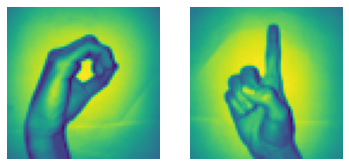

In [3]:
##data load
#사전에 받아온 파일,npy는 사진을 데이터화하여 데이터셋으로 만든 파일
x_1 = np.load('data/X.npy')
y_1 = np.load('data/Y.npy')

img_size = 64
plt.subplot(1,2,1)

#현재 데이터화 되어있기때문에 plt.imshow함수를 이용하여 이미지 사이즈를 재 설정하여야 사진이 나옴.
plt.imshow(x_1[260].reshape(img_size, img_size))
plt.axis('off') #이건 뭔지 모르겠는데 그냥 끄는거?
plt.subplot(1,2,2)
plt.imshow(x_1[900].reshape(img_size, img_size))
plt.axis('off')

#### 데이터 전처리 구간

In [4]:
X = np.concatenate((x_1[204:409] , x_1[822:1027]), axis=0)
#concatenate : numpy의 배열을 합치는 함수 중 한가지

z = np.zeros(205) #1차의 0을 205개 만들어라
o = np.ones(205) #1차원의 1을 205개 만들어라
Y = np.concatenate((z,o), axis=0).reshape(X.shape[0],1)
print(f"X Shape : {X.shape}")
print(f"Y Shape : {Y.shape}")

X Shape : (410, 64, 64)
Y Shape : (410, 1)


In [5]:
##Train, Test분리
#이거 많이 쓰니까 알아야함.
from sklearn.model_selection import train_test_split

#test_size = 0.15인 이유는 총 데이터 1.00에서 0.15%만큼 떼어와 테스트(학습)데이터로 만들기 위해.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

#이렇게 설정 한 이유는 혹시 나중에 코드를 손볼때 테스트사이즈를 바꾸게 될 수도 있기때문에 아예 변수로 지정.
number_of_train = x_train.shape[0]
number_of_test = x_test.shape[0]

#언젠간 쓰겠지,, 비율은 85% : 15%
print(f'train_shaple :{number_of_train} test_shape :{number_of_test}')

train_shaple :348 test_shape :62


In [6]:
##차원변경 3차원에서 2차원으로
x_train_flattern = x_train.reshape(number_of_train,x_train.shape[1]*x_train.shape[2])
x_test_flattern = x_test.reshape(number_of_test,x_test.shape[1]*x_test.shape[2])

#차원변경 후 크기 측정
print(f'x_train_flattern :{x_train_flattern.shape}, x_test_flattern :{x_test_flattern.shape}')

x_train_flattern :(348, 4096), x_test_flattern :(62, 4096)


In [7]:
#행렬을 전치
X_train = x_train_flattern.T
X_test = x_test_flattern.T
Y_train = y_train.T
Y_test = y_test.T

X_train.shape[1]

348

## **** Logistic Regression
기본 원리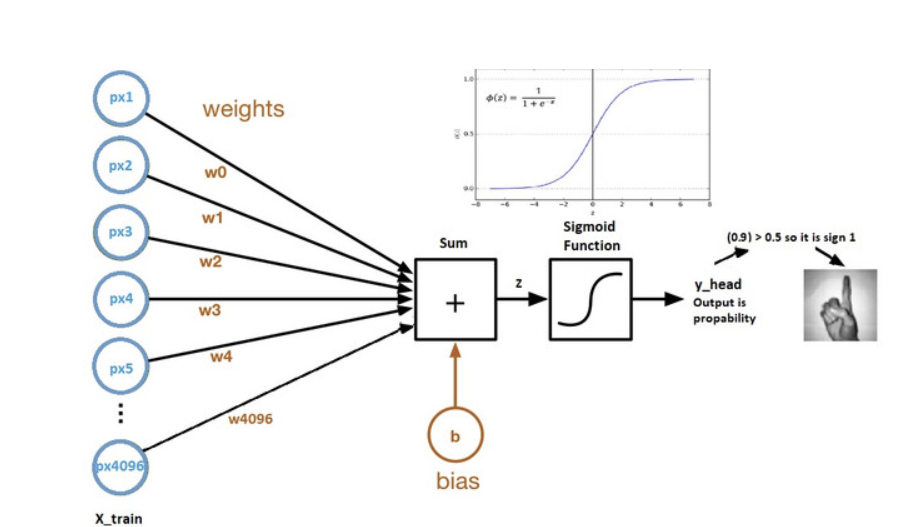

In [8]:
##Forward Progation
#위의 그림을 토대로 만든 함수들. 각각에 들어가는 값들은 임의 설정
def dummy(parameter):
    dummy_parmeter = parameter+5
    return dummy_parmeter
result = dummy(3)

def initialize_weight_and_bias(dimension):
    w = np.full((dimension, 1), 0.01)
    b = 0.0
    return w, b

def sigmoid_function(z):
    y_head = 1/(1+np.e**(-z))
    return y_head
    #위와 같은 코드
    #1/np.exp(num)
    
## ================================ 합체 ================================##
def forward_progation(weight, bias, X_train, Y_train):
    z = np.dot(weight.T, X_train) + bias 
    #Numpy의 dot은 numpy array를 곱할때 사용
    #weight.T는 weight의 행렬 전치를 위하여 예로 (3,2) => (2,3)이렇게 바꿔줌
    y_head = sigmoid_function(z)
    loss = -Y_train * np.log(y_head) - (1-Y_train) * np.log(1-y_head)
    #loss는 미분단계
    cost = np.sum(loss)/X_train.shape[1]
    return cost

In [9]:
weight, bias = initialize_weight_and_bias(4096)
cost = forward_progation(weight, bias,X_train,Y_train)
print(type(cost))

<class 'numpy.float64'>


### Graient Descnet

In [11]:
def backward_propagation(weight, bias, X_train, Y_train):
    z = np.dot(weight.T, X_train) + bias
    y_head = sigmoid_function(z)
    loss = -Y_train*np.log(y_head) - (1-Y_train)/np.log(1-y_head)
    cost = np.sum(loss)/X_train.shape[1]
    derivate_weight = np.dot(X_train,((y_head-Y_train).T))/X_train.shape[1]
    derivate_bias = np.sum(y_head - Y_train)/X_train.shape[1]
    gredients = ['derivate_weight :',derivate_weight,'derivate_bias :',derivate_bias]
    return cost , gredients

weight, bias = initialize_weight_and_bias(4096)
cost, derivate_dict = backward_propagation(weight, bias ,X_train,Y_train)
weight = derivate_dict[0]
bias = derivate_dict[1]
print(weight, bias)
print(cost)

derivate_weight : [[0.26381565]
 [0.2691909 ]
 [0.27409286]
 ...
 [0.24135678]
 [0.23780708]
 [0.23305161]]
0.017485444391629603
